In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!pip install catboost

     |████████████████████████████████| 66.3MB 57kB/s 


In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/test.csv')

In [4]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_data.shape

(381109, 12)

In [6]:
train_data = train_data.drop(['id'], axis=1)
test_data = test_data.drop(['id'], axis=1)

In [7]:
train_data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train_data[numerical_columns].describe()

NameError: ignored

In [9]:
train_data[categorical_columns].describe()

NameError: ignored

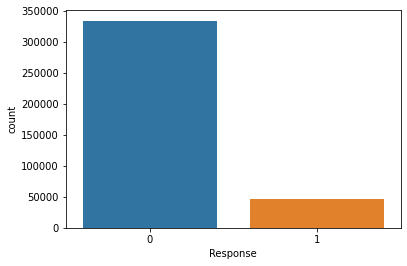

In [10]:
sns.countplot(train_data['Response'])

In [11]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
            'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes',
            'Region_Code','Policy_Sales_Channel']

In [12]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [13]:
#Converting The categorical feature 'Gender' to a binary variable. Can be done using get_dummies pandas as well
train_data.loc[train_data['Gender'] == 'Male', 'Gender'] = 1
train_data.loc[train_data['Gender'] == 'Female', 'Gender'] = 0
test_data.loc[test_data['Gender'] == 'Male', 'Gender'] = 1
test_data.loc[test_data['Gender'] == 'Female', 'Gender'] = 0

In [14]:
#Converting the categorical feature Vehical age to numerical
train_data.loc[train_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train_data.loc[train_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train_data.loc[train_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

test_data.loc[test_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test_data.loc[test_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test_data.loc[test_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

In [15]:
#Converting the categorical feature Vehical Damage to numerical
train_data.loc[train_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train_data.loc[train_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test_data.loc[test_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test_data.loc[test_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [16]:
for col in train_data.columns:
    train_data[col] = train_data[col].astype(np.int32)

In [17]:
for col in train_data.columns:
    if col == 'Response':
        continue
    print(col, train_data[col].corr(train_data['Response']))

Gender 0.05243991377134205
Age 0.11114689471251019
Driving_License 0.01015517459407371
Region_Code 0.01056985561522313
Previously_Insured -0.34117046261352385
Vehicle_Age 0.2218739872179906
Vehicle_Damage 0.35439954387975453
Annual_Premium 0.022574695542560037
Policy_Sales_Channel -0.139041500829161
Vintage -0.0010503720019898887


In [18]:
from sklearn.utils import resample,shuffle
train_majority = train_data[train_data['Response']==0]
train_minority = train_data[train_data['Response']==1]
train_majority_downsampled = resample(train_majority,replace=False,n_samples=46710)

In [19]:
balanced_train_data = pd.concat([train_minority,train_majority_downsampled])
balanced_train_data = shuffle(balanced_train_data)
balanced_train_data.Response.value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [20]:
balanced_train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000
mean,0.571473,40.813016,0.998512,26.548705,0.262042,0.755630,0.709580,30961.271077,103.336716,154.188204,0.500000
std,0.494868,14.345447,0.038545,12.648713,0.439748,0.566066,0.453958,17664.989722,55.905047,83.637412,0.500003
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,27.000000,1.000000,16.000000,0.000000,0.000000,0.000000,24530.000000,26.000000,82.000000,0.000000
50%,1.000000,41.000000,1.000000,28.000000,0.000000,1.000000,1.000000,32182.500000,124.000000,154.000000,0.500000
75%,1.000000,50.000000,1.000000,34.000000,1.000000,1.000000,1.000000,40262.000000,152.000000,226.000000,1.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [21]:
balanced_train_data.shape

(93420, 11)

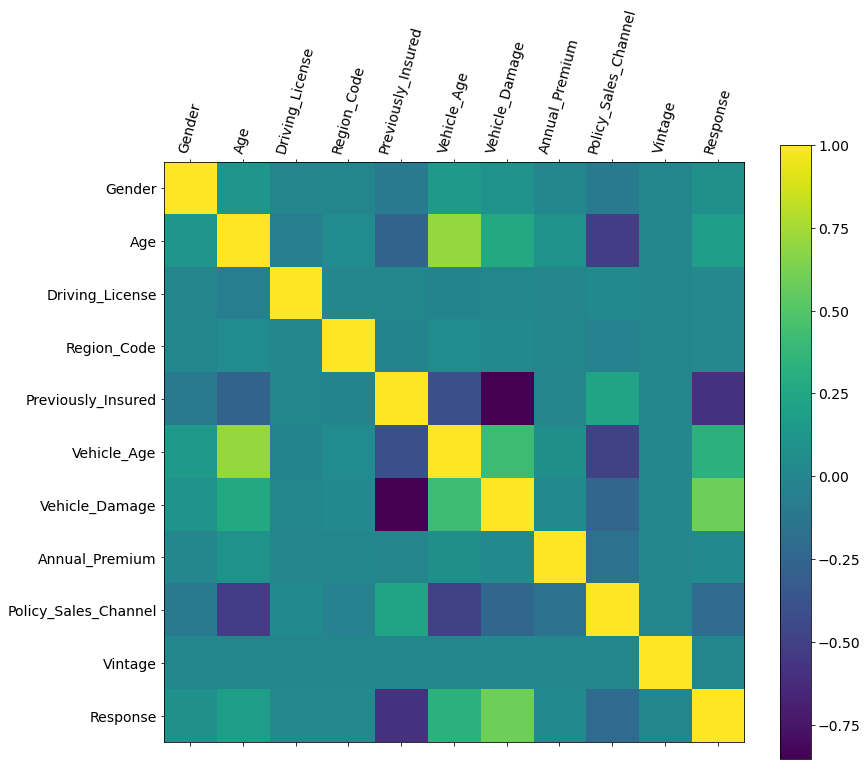

In [22]:
f = plt.figure(figsize=(13, 11))
plt.matshow(balanced_train_data.corr(), fignum=f.number)
plt.xticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14, rotation=75)
plt.yticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Age distribution according to Response


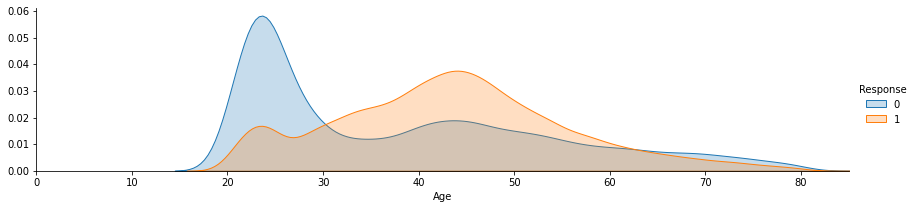

In [23]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(balanced_train_data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,balanced_train_data["Age"].max()))
facetgrid.add_legend();

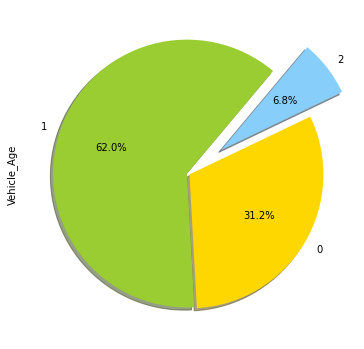

In [24]:
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold',"lightskyblue"]
balanced_train_data['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
scale = StandardScaler()
balanced_train_data[num_feat] = scale.fit_transform(balanced_train_data[num_feat])

In [27]:
test_data[num_feat] = scale.fit_transform(test_data[num_feat])

In [28]:
min_max = MinMaxScaler()
balanced_train_data[['Annual_Premium']] = min_max.fit_transform(balanced_train_data[['Annual_Premium']])

In [29]:
test_data[['Annual_Premium']] = min_max.fit_transform(test_data[['Annual_Premium']])

In [30]:
balanced_train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
309693,0,-0.544637,1,11,0,1,1,0.053005,154,1.731433,1
292277,1,-0.335510,1,28,0,1,1,0.069953,122,0.906439,1
100066,0,-0.893181,1,46,0,0,0,0.040451,152,-0.480508,0
137906,1,1.337504,1,7,1,1,0,0.000000,26,-0.026163,0
273987,0,0.152452,1,13,0,1,0,0.000000,154,0.487964,0


In [31]:
test_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,-0.890089,1,11.0,1,0,0,0.070633,152.0,-1.211054
1,1,0.079795,1,28.0,0,1,1,0.066321,7.0,-0.517782
2,1,0.532408,1,28.0,0,1,1,0.079717,124.0,0.534079
3,1,-0.954748,1,27.0,1,0,1,0.073978,152.0,0.390643
4,1,-0.760771,1,28.0,1,0,0,0.120293,152.0,1.705469


In [32]:
cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report

In [35]:
balanced_train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
309693,0,-0.544637,1,11,0,1,1,0.053005,154,1.731433,1
292277,1,-0.335510,1,28,0,1,1,0.069953,122,0.906439,1
100066,0,-0.893181,1,46,0,0,0,0.040451,152,-0.480508,0
137906,1,1.337504,1,7,1,1,0,0.000000,26,-0.026163,0
273987,0,0.152452,1,13,0,1,0,0.000000,154,0.487964,0


In [36]:
X = balanced_train_data.drop(['Response'],axis=1)

In [37]:
y = balanced_train_data['Response']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [40]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 1000, depth= 9, border_count= 20,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))


0:	test: 0.8354885	best: 0.8354885 (0)	total: 226ms	remaining: 3m 46s
50:	test: 0.8548092	best: 0.8548092 (50)	total: 5.99s	remaining: 1m 51s
100:	test: 0.8578807	best: 0.8578807 (100)	total: 11.7s	remaining: 1m 44s
150:	test: 0.8586391	best: 0.8586435 (149)	total: 17.4s	remaining: 1m 37s
200:	test: 0.8587764	best: 0.8587999 (185)	total: 23.4s	remaining: 1m 33s
250:	test: 0.8587263	best: 0.8587999 (185)	total: 28.9s	remaining: 1m 26s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.8587999204
bestIteration = 185

Shrink model to first 186 iterations.
CatBoost ROC AUC SCORE: 0.8587999204130157


ValueError: ignored

In [41]:
y_pred = cat.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77     11678
           1       0.74      0.93      0.82     11677

    accuracy                           0.80     23355
   macro avg       0.82      0.80      0.80     23355
weighted avg       0.82      0.80      0.80     23355



In [42]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,categorical_feature=cat_col,early_stopping_rounds= 50)


pred_proba = lgb.predict_proba(X_test)[:, 1]
print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_test, pred_proba)))

Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.856939
[100]	valid_0's auc: 0.857853
[150]	valid_0's auc: 0.858176
[200]	valid_0's auc: 0.858258
[250]	valid_0's auc: 0.858275
Early stopping, best iteration is:
[243]	valid_0's auc: 0.858317
Lightgbm ROC AUC SCORE: 0.8583170583885605


In [43]:
y_pred = lgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     11678
           1       0.74      0.93      0.82     11677

    accuracy                           0.80     23355
   macro avg       0.82      0.80      0.80     23355
weighted avg       0.82      0.80      0.80     23355



In [39]:
param = { 'depth':[3,1,2,6,4,8,9,10,20,30,50],
         'iterations':[250,100,500,1000],
         'learning_rate':[0.03,0.001,0.01,0.1,0.13,0.2,0.3],
         'l2_leaf_reg':[3,1,5,10,100],
         'border_count':[32,5,10,20,100,200]
        }

In [40]:
from sklearn.model_selection import RandomizedSearchCV

randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",randm.best_params_)

0:	total: 28.6ms	remaining: 7.13s
1:	total: 56ms	remaining: 6.95s
2:	total: 82.9ms	remaining: 6.83s
3:	total: 110ms	remaining: 6.77s
4:	total: 137ms	remaining: 6.73s
5:	total: 164ms	remaining: 6.69s
6:	total: 189ms	remaining: 6.57s
7:	total: 216ms	remaining: 6.55s
8:	total: 244ms	remaining: 6.54s
9:	total: 268ms	remaining: 6.42s
10:	total: 295ms	remaining: 6.4s
11:	total: 322ms	remaining: 6.39s
12:	total: 356ms	remaining: 6.5s
13:	total: 379ms	remaining: 6.39s
14:	total: 400ms	remaining: 6.27s
15:	total: 426ms	remaining: 6.24s
16:	total: 457ms	remaining: 6.27s
17:	total: 480ms	remaining: 6.19s
18:	total: 505ms	remaining: 6.14s
19:	total: 531ms	remaining: 6.11s
20:	total: 553ms	remaining: 6.03s
21:	total: 581ms	remaining: 6.02s
22:	total: 608ms	remaining: 6s
23:	total: 634ms	remaining: 5.97s
24:	total: 665ms	remaining: 5.98s
25:	total: 687ms	remaining: 5.92s
26:	total: 713ms	remaining: 5.89s
27:	total: 740ms	remaining: 5.87s
28:	total: 766ms	remaining: 5.84s
29:	total: 789ms	remaining: 

In [41]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.3, l2_leaf_reg=10, iterations= 250, depth= 4, border_count= 32,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))

0:	test: 0.8239628	best: 0.8239628 (0)	total: 98.3ms	remaining: 24.5s
50:	test: 0.8606592	best: 0.8606592 (50)	total: 3.47s	remaining: 13.5s
100:	test: 0.8606556	best: 0.8606929 (63)	total: 6.72s	remaining: 9.91s
150:	test: 0.8604359	best: 0.8607840 (113)	total: 10.2s	remaining: 6.71s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.8607839557
bestIteration = 113

Shrink model to first 114 iterations.
CatBoost ROC AUC SCORE: 0.860783955701624


In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 194.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 354.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(bootstrap = True,max_depth = 100,max_features =  3,min_samples_leaf =  5,
                              min_samples_split = 12,n_estimators = 1000,criterion = 'entropy')
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(f"Accuracy score is {100*accuracy_score(y_test,rfc_pred).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,rfc_pred).round(2)}")

Accuracy score is 80.0
ROC-AUC score is 80.0
